# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Translating the business problem into a data task: The historical data can be broken into an output variable, which is the price, and input variables, which are all the other features of the cars. By building the proper regression model to predict the price based off of the input features, we can then look into the features that have the largest coefficient. Those features are the criteria that can be presented to dealers as the most important factors in determining the price. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### Some of the first things to check about the data are the number of rows with NA values. Given we have a large dataset, it should be ok to eliminate the rows that have columns with NA values as long as we're left with big chunk of the original data. The same can applied to columns. If there are certain columns of the dataset where majority of the rows have an NA value, those columns can be dropped. Lastly, we will make judgement calls at this step if there are columns that may not add value in our price prediction and we want to drop them.


#### Next, we need to get better understanding of the columns. For those columns with numerical values, we can draw histograms to get better understanding of the distributions. For those columns with categorical values, we need to understand the distinct values and define a method to convert them into numerical columns (i.e. one hot encoding)

## Importing the Libraries

In [272]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import GridSearchCV
import random
import plotly.graph_objects as go
from sklearn.linear_model import Lasso
from sklearn.inspection import permutation_importance

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [134]:
df = pd.read_csv('data/vehicles.csv')

In [135]:
df.isna().sum() ## We can see here that there are a lot of NA values in this dataset. Looking at the counts,
# missing data are either in the order of thousands or hundred of thousands. Thus, one way to clean the data is to
# drop the entire column if the missing data is in the order of hundreds of thousands and drop the row if the missing
# data is in the order of thousands.

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [136]:
df_dropna = df.drop(columns = ['VIN', 'drive', 'size', 'type', 'paint_color', 'region', 'condition','cylinders', 'model', 'state', 'id'])
## Dropping the columns due to: 
### too many NaN: 'VIN', 'drive', 'size', 'type', 'paint_color', 'region', 'cylinders', 'condition'
### too granular to add value to the model: region, state and model
## note: Cylinder and condition are...

In [44]:
## Next, I'll plot the different variables to get better understanding of the data

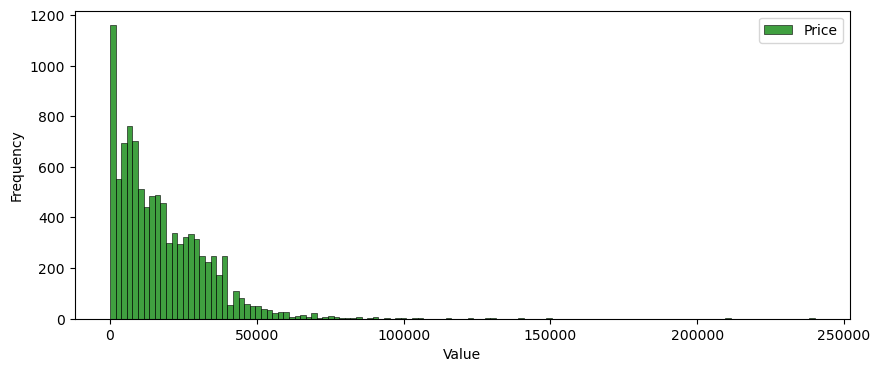

In [138]:
plt.figure(figsize=(10, 4))  

sns.histplot(data=df_dropna['price'].sample(n = 10000, random_state = 22), color = 'green', label='Price')
##sns.histplot(data=df_dropna['year'].sample(n = 10000, random_state = 22), color = 'blue', label='Year')
##sns.histplot(data=df_dropna['odometer'].sample(n = 10000, random_state = 22), color = 'purple', label='Mileage')
#plt.xlim(0, 100000) 
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

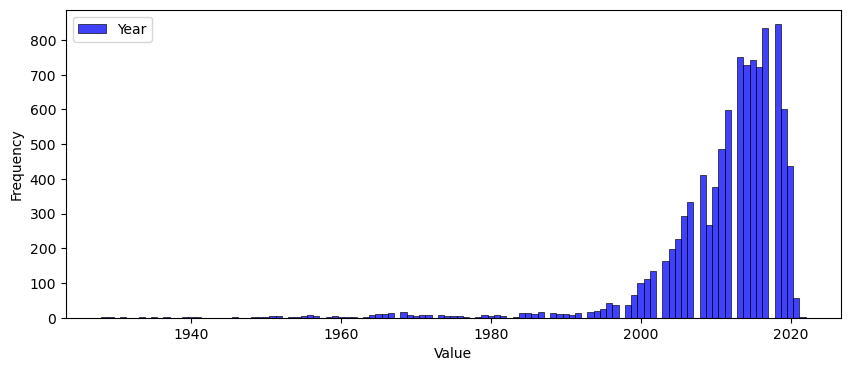

In [139]:
plt.figure(figsize=(10, 4))  

##sns.histplot(data=df_dropna['price'].sample(n = 10000, random_state = 22), color = 'green', label='Price')
sns.histplot(data=df_dropna['year'].sample(n = 10000, random_state = 22), color = 'blue', label='Year')
##sns.histplot(data=df_dropna['odometer'].sample(n = 10000, random_state = 22), color = 'purple', label='Mileage')
 
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

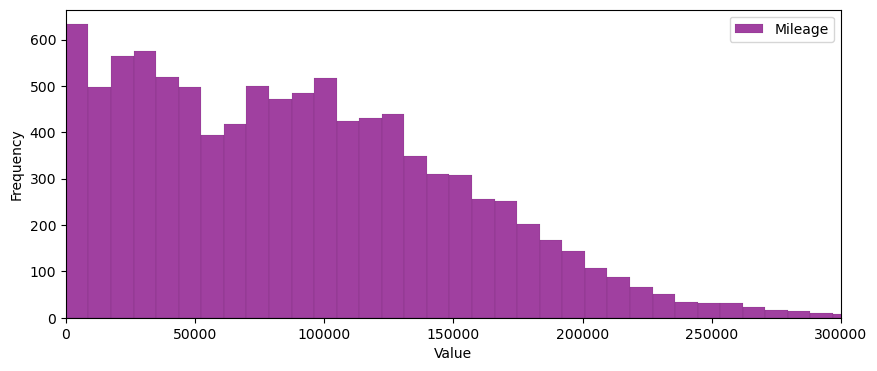

In [140]:
plt.figure(figsize=(10, 4))  

##sns.histplot(data=df_dropna['price'].sample(n = 10000, random_state = 22), color = 'green', label='Price')
##sns.histplot(data=df_dropna['year'].sample(n = 10000, random_state = 22), color = 'blue', label='Year')
sns.histplot(data=df_dropna['odometer'].sample(n = 10000, random_state = 22), color = 'purple', label='Mileage')
plt.xlim(0, 300000) 
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

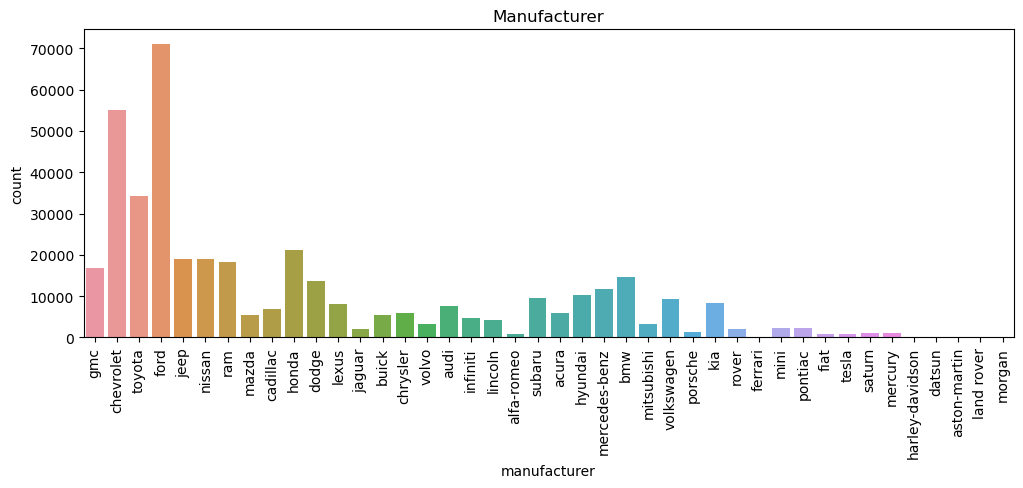

In [141]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df_dropna, x='manufacturer')
plt.title('Manufacturer')
plt.xticks(rotation=90)

plt.show()

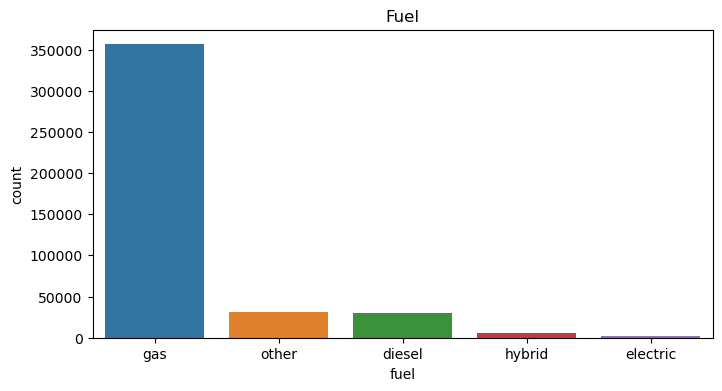

In [142]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_dropna, x='fuel')
plt.title('Fuel')

plt.show()

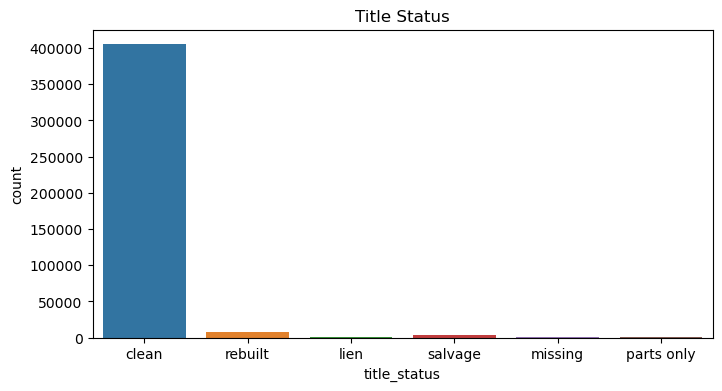

In [143]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_dropna, x='title_status')
plt.title('Title Status')

plt.show()

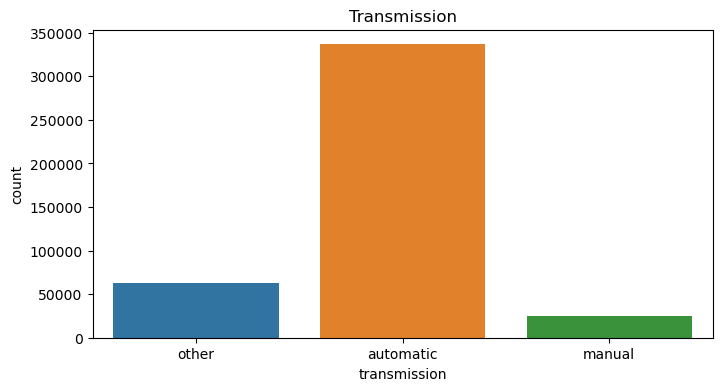

In [144]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_dropna, x='transmission')
plt.title('Transmission')

plt.show()

In [15]:
# Conclusion: Majority of the cars in the dataset have automatic transmission, have clean title, are gas powered,
# are in good or excellent condition, were built after 2020, have mileage of up to 300k. Chevy, Ford and Toyota are
# the most common manufacturers.

In [16]:
# One difficult decision in here is to drop the condition column. Though an important factor, there are too many 
# NA columns. This shouldn't impact the model too much given most cars are in either the excellent or good condition.
# In addition, there has to be a high correlation between the condition and age of the car. Thus, we will expect a
# high weight on the year.

In [37]:
# After having iterated through the models produced in this exercise, I obtained some unexpected behavior with coefficients
# It became clear that it had to do with outliers in the data with vehicles that are too expensive or too old.
# Thus, I'll be limiting the model to cars that cost less 80K and were built after 1990 to eliminate the outliers.

In [149]:
df_nooutlier = df_dropna[(df_dropna['year'] > 1990) & (df_dropna['price'] < 80_000)]

In [17]:
# Instead of 'year', I like to use age. Thus will convert the values as follows:

In [150]:
df_nooutlier['age'] = (2023 - df_nooutlier['year'])
df_nooutlier = df_nooutlier.drop(columns = 'year')

In [152]:
df_nooutlier.isna().sum()

price               0
manufacturer    13914
fuel             2724
odometer         4271
title_status     7879
transmission     2456
age                 0
dtype: int64

In [ ]:
# Now dropping any final rows that have values of NA

In [153]:
df_nona = df_nooutlier.dropna()

In [157]:
df_nona

,price,manufacturer,fuel,odometer,title_status,transmission,age
27,33590,gmc,gas,57923.0,clean,other,9
28,22590,chevrolet,gas,71229.0,clean,other,13
29,39590,chevrolet,gas,19160.0,clean,other,3
30,30990,toyota,gas,41124.0,clean,other,6
31,15000,ford,gas,128000.0,clean,automatic,10
...,...,...,...,...,...,...,...
426875,23590,nissan,gas,32226.0,clean,other,4
426876,30590,volvo,gas,12029.0,clean,other,3
426877,34990,cadillac,diesel,4174.0,clean,other,3
426878,28990,lexus,gas,30112.0,clean,other,5


In [25]:
#Next, I want to convert the categorical columns to numerical: fuel, title_status and transmission

In [158]:
df_encoded = pd.get_dummies(df_nona, columns=['fuel', 'transmission', 'title_status'])

In [159]:
# Next, based on some online research, the luxury and non-luxury cars can have different pricing for used cars. Thus,
# I'll be working on dividing the data into two dataframes for luxury and non-luxury, building seperate models for them
# and comparing the findings.

In [60]:
luxury_cars = ['cadillac', 'lexus', 'jaguar', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo', 'acura', 'mercedes-benz', 'bmw', 'porsche', 'land rover', 'ferrari', 'aston-martin', 'morgan', 'tesla']
non_luxury_cars = ['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram', 'mazda', 'honda', 'dodge', 'buick', 'chrysler', 'subaru', 'hyundai', 'mitsubishi', 'volkswagen', 'kia', 'mini', 'pontiac', 'fiat', 'saturn', 'mercury', 'harley-davidson', 'datsun']

In [160]:
df_luxury = df_encoded[df_encoded['manufacturer'].isin(luxury_cars)]
df_nonluxury = df_encoded[df_encoded['manufacturer'].isin(non_luxury_cars)]

In [62]:
# will be eliminating the manufacturer column now that the dataset is divided into luxury and non-luxury

In [161]:
df_luxury = df_luxury.drop(columns = 'manufacturer')
df_nonluxury = df_nonluxury.drop(columns = 'manufacturer')

In [32]:
# Lastly, defing the X and y for the model

In [165]:
X_luxury = df_luxury.drop(columns = 'price')
X_nonluxury = df_nonluxury.drop(columns = 'price')
y_luxury = df_luxury['price']
y_nonluxury = df_nonluxury['price']

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [66]:
## to summarize where we stand, we have 16 columns in hand that will be used to predict the value of the output column.
# Building a linear or polynomial model alone will for certain lead to overfitting. 
# To avoid feature fitting, we've learned two main methods: Sequential Feature Selection and Regularization
# for the purposes of this exercise, Regularization is a better approach as it allows us to keep all of the features
# and make determinations about which features are more important.

In [67]:
# I will start the regularization exercise by focusing on Ridge Model. I will be utilizing a grid search that returns
# the optimal degree of polynomial and the optimal alpha
# Note: given we already have 16 columns and using Ridge model to keep all the features in place, I'll keep the polynomial
# degree to one and won't pass in a polynomial degree argument into the gridsearch

In [68]:
# The first step is to define a pipeline

In [214]:
pipe1 = Pipeline([
    ('scaling', StandardScaler()),
    ('ridge', Ridge())
])

In [215]:
# next, I'll define a dictionary for parameters I want to try with my grid search object

In [216]:
params1 = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100, 500]
}

In [217]:
# next, I'll define the gridsearchCV

In [218]:
grid1 = GridSearchCV(
            estimator = pipe1, 
            param_grid = params1, 
            scoring = 'neg_mean_squared_error',
            cv = 5)

In [219]:
grid1.fit(X_luxury, y_luxury)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.01, 0.1, 1, 10, 100, 500]},
             scoring='neg_mean_squared_error')

In [220]:
grid1.best_params_

{'ridge__alpha': 100}

In [221]:
mse_luxury_degree1 = abs(grid1.best_score_)


In [222]:
best_model1 = grid1.best_estimator_

In [223]:
ridge_coefs1 = best_model1.named_steps['ridge'].coef_

In [224]:
feature_names1 = X_luxury.columns

In [561]:
# Now applying the same to non_luxury cars.

In [230]:
pipe2 = Pipeline([
    ('scaling', StandardScaler()),
    ('ridge', Ridge())
])

In [231]:
params2 = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100, 200, 300, 400, 500, 1000, 2000]
}

In [232]:
grid2 = GridSearchCV(
            estimator = pipe2, 
            param_grid = params2, 
            scoring = 'neg_mean_squared_error',
            cv = 5)

In [233]:
grid2.fit(X_nonluxury, y_nonluxury)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.01, 0.1, 1, 10, 100, 200, 300, 400,
                                          500, 1000, 2000]},
             scoring='neg_mean_squared_error')

In [234]:
grid2.best_params_

{'ridge__alpha': 1000}

In [236]:
mse_notluxury_degree1=abs(grid2.best_score_)


In [237]:
best_model2 = grid2.best_estimator_

In [238]:
ridge_coefs2 = best_model2.named_steps['ridge'].coef_

In [239]:
feature_names2 = X_nonluxury.columns

In [445]:
# Now repeating these steps but with a higher degree polynomial to see how much the MSE can be imporved.

In [241]:
pipe3 = Pipeline([
    ('polynomial', PolynomialFeatures(include_bias = False)),
    ('scaling', StandardScaler()),
    ('ridge', Ridge())
])

In [242]:
params3 = {
    'polynomial__degree': [1, 2, 3],
    'ridge__alpha': [0.01, 0.01, 0.1, 1, 10, 100, 200]
}

In [243]:
grid3 = GridSearchCV(
            estimator = pipe3, 
            param_grid = params3, 
            scoring = 'neg_mean_squared_error',
            cv = 5)

In [244]:
grid3.fit(X_luxury, y_luxury)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaling', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomial__degree': [1, 2, 3],
                         'ridge__alpha': [0.01, 0.01, 0.1, 1, 10, 100, 200]},
             scoring='neg_mean_squared_error')

In [245]:
grid3.best_params_

{'polynomial__degree': 2, 'ridge__alpha': 0.01}

In [246]:
mse_luxury_degree2 = abs(grid3.best_score_)

In [247]:
pipe4 = Pipeline([
    ('polynomial', PolynomialFeatures(include_bias = False)),
    ('scaling', StandardScaler()),
    ('ridge', Ridge())
])

In [248]:
params4 = {
    'polynomial__degree': [1, 2, 3],
    'ridge__alpha': [0.01, 0.01, 0.1, 1, 10, 100, 200]
}

In [249]:
grid4 = GridSearchCV(
            estimator = pipe4, 
            param_grid = params4, 
            scoring = 'neg_mean_squared_error',
            cv = 5)

In [250]:
grid4.fit(X_nonluxury, y_nonluxury)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaling', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomial__degree': [1, 2, 3],
                         'ridge__alpha': [0.01, 0.01, 0.1, 1, 10, 100, 200]},
             scoring='neg_mean_squared_error')

In [251]:
grid4.best_params_

{'polynomial__degree': 2, 'ridge__alpha': 200}

In [252]:
mse_notluxury_degree2 = abs(grid4.best_score_)

In [254]:
# printing out the MSEs for degree one and degree two

In [253]:

print(mse_luxury_degree1)
print(mse_notluxury_degree1)
print(mse_luxury_degree2)
print(mse_notluxury_degree2)

112898574.98253886
135286019.7736339
107697332.55035424
125031291.70159379


In [255]:
## Calculating the improvement in MSE obtained by increasing the polynomial degree from 1 to 2

In [256]:
abs(mse_luxury_degree1-mse_luxury_degree2)/mse_luxury_degree1

0.04607004502040045

In [258]:
abs(mse_notluxury_degree1-mse_notluxury_degree2)/mse_notluxury_degree1

0.075800353127387

In [259]:
## There will be 4.6% imporovement in MSE for Luxury and 7.6% improvement for non-luxury by increasing the polynomial
# degree from 1 to 2. However, to simplify the explanations, we will move forward with degree 1.

In [260]:
## next, comparing the features for degree 1 Luxury to non_Luxury

In [310]:
import plotly.graph_objects as go

fields1 = feature_names1
values1 = np.ravel(ridge_coefs1)

fields2 = feature_names2
values2 = np.ravel(ridge_coefs2)

# Create a horizontal bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    y=fields1,
    x=values1,
    orientation='h',
    name='Luxury',
))

fig.add_trace(go.Bar(
    y=fields2,
    x=values2,
    orientation='h',
    name='None Luxury',
))

# Customize the layout
fig.update_layout(
    title='Luxury vs. Non-Luxury Coeffs - Ridge Model',
    title_x=0.5,
    xaxis_title='Ridge Coefs',
    yaxis_title='Features',
)

# Sort the fields for each set of data
sorted_fields1 = [field for _, field in sorted(zip(values1, fields1))]
sorted_fields2 = [field for _, field in sorted(zip(values2, fields2))]

# Update the y-axis category order for each set of data
fig.update_yaxes(categoryorder='array', categoryarray=sorted_fields1, side='left')
fig.update_yaxes(categoryorder='array', categoryarray=sorted_fields2, side='left') 
# Show the chart
fig.show()


In [271]:
##df_test = df_encoded[df_encoded['manufacturer'].isin(luxury_cars)]
##df_test[df_test['fuel_diesel'] == 1]

In [273]:
# Next, I'll apply permutation importance to ensure the results are aligned with the coeffs

In [275]:
perm_importance1 = permutation_importance(best_model1, X_luxury, y_luxury)

In [277]:
feature_importances1 = perm_importance1.importances_mean

array([1.07230643e-02, 5.26380959e-01, 1.70046421e-04, 4.71189895e-03,
       6.86714229e-04, 7.43258281e-06, 1.36038771e-04, 2.19885811e-02,
       2.62023971e-03, 1.81828847e-02, 3.57302029e-04, 2.69928266e-04,
       1.02316518e-04, 1.24830367e-05, 2.73247335e-04, 3.55979743e-04])

In [281]:
X_columns = X_luxury.columns

In [282]:
perm_importance2 = permutation_importance(best_model2, X_luxury, y_luxury)

In [283]:
feature_importances2 = perm_importance2.importances_mean

In [284]:
import plotly.graph_objects as pt

fields1 = X_columns
values1 = feature_importances1

fields2 = X_columns
values2 = feature_importances2

# Create a horizontal bar chart
fig = pt.Figure()

fig.add_trace(go.Bar(
    x=values1,
    y=fields1,
    orientation='h',
    name='Luxury',
))

fig.add_trace(go.Bar(
    x=values2,
    y=fields2,
    orientation='h',
    name='Non-luxury',
))

# Customize the layout
fig.update_layout(
    title='Feature Importance',
    title_x=0.5,
    xaxis_title='Importance',
    yaxis_title='Features',
)

sorted_fields1 = [field for _, field in sorted(zip(values1, fields1))]
sorted_fields2 = [field for _, field in sorted(zip(values2, fields2))]
combined_fields = sorted_fields1 + sorted_fields2

fig.update_yaxes(categoryorder='array', categoryarray=combined_fields, side='left')

fig.update_traces(marker=dict(color='rgba(50, 100, 200, 0.6)'), selector=dict(name='Dataset 1'))
fig.update_traces(marker=dict(color='rgba(200, 100, 50, 0.6)'), selector=dict(name='Dataset 2'))

# Show the chart
fig.show()


In [587]:
## Now trying Lasso model. Given the computation constraints, we'll only model degree 1 polynomials.

In [289]:
pipe5 = Pipeline([
    ('scaling', StandardScaler()),
    ('lasso', Lasso())
])

In [290]:
params5 = {
    'lasso__alpha': [0.01, 0.01, 0.1, 1, 10, 100]
}

In [291]:
grid5 = GridSearchCV(
            estimator = pipe5, 
            param_grid = params5, 
            scoring = 'neg_mean_squared_error',
            cv = 5)

In [292]:
grid5.fit(X_luxury, y_luxury)

/Users/k1files/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.311e+10, tolerance: 1.113e+09

/Users/k1files/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.361e+10, tolerance: 1.113e+09

/Users/k1files/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.670e+10, tolerance: 1.104e+09

/Users/k1files/opt/anacon

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.01, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [293]:
grid5.best_params_

{'lasso__alpha': 10}

In [295]:
abs(grid5.best_score_)

112894793.5725976

In [302]:
best_model5 = grid5.best_estimator_

In [304]:
lasso_coefs1 = best_model5.named_steps['lasso'].coef_

In [296]:
pipe6 = Pipeline([
    ('scaling', StandardScaler()),
    ('lasso', Lasso())
])

In [297]:
params6 = {
    'lasso__alpha': [0.01, 0.01, 0.1, 1, 10, 100]
}

In [298]:
grid6 = GridSearchCV(
            estimator = pipe6, 
            param_grid = params6, 
            scoring = 'neg_mean_squared_error',
            cv = 5)

In [299]:
grid6.fit(X_nonluxury, y_nonluxury)

/Users/k1files/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.737e+11, tolerance: 5.096e+09

/Users/k1files/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.178e+11, tolerance: 5.201e+09

/Users/k1files/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.295e+11, tolerance: 5.107e+09

/Users/k1files/opt/anacon

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.01, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [300]:
grid6.best_score_

-135286163.431145

In [306]:
best_model6 = grid6.best_estimator_

In [307]:
lasso_coefs2 = best_model6.named_steps['lasso'].coef_

In [309]:


fields1 = feature_names1
values1 = np.ravel(lasso_coefs1)

fields2 = feature_names2
values2 = np.ravel(lasso_coefs2)

# Create a horizontal bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    y=fields1,
    x=values1,
    orientation='h',
    name='Luxury',
))

fig.add_trace(go.Bar(
    y=fields2,
    x=values2,
    orientation='h',
    name='None Luxury',
))

# Customize the layout
fig.update_layout(
    title='Luxury vs. Non-Luxury Coeffs - Lasso Model',
    title_x=0.5,
    xaxis_title='Lasso Coefs',
    yaxis_title='Features',
)

# Sort the fields for each set of data
sorted_fields1 = [field for _, field in sorted(zip(values1, fields1))]
sorted_fields2 = [field for _, field in sorted(zip(values2, fields2))]

# Update the y-axis category order for each set of data
fig.update_yaxes(categoryorder='array', categoryarray=sorted_fields1, side='left')
fig.update_yaxes(categoryorder='array', categoryarray=sorted_fields2, side='left') 
# Show the chart
fig.show()


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Most of the evaluation is already commented in the code. In summary, though degree 2 polynomial had slight smaller MSE, given the clarity that is needed to explain the coefficients to the client, we decided to move forward with a degree 1 model. In addition, we divided the dataset into two parts, Luxury and non-Luxury given the different pricing discussions that go with each bucket and found some interesting insight. Lastly, the result of the Ridge model aligns well with permutation importance and with Lasso model. This gives us better confidence that models have a good degree of accuracy.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

#### We are ready to present our findings to you regarding the factors that drive used car prices. As we know you generally distinguish between the Luxury and Non-Luxury used car market, we analyzed both segments of the market and are ready to share our findings with you. Without going into much detail, we'd like to assure you that we took the time to examine multiple ML models (i.e. regression and Lasso) and compared our findings to ensure we provide you with the best possible insight.

#### To present our findings, we'll break down the discussion into factor influence higher and lower prices for a used car: 

#### Both in Luxury and Non Luxury market, we found that the biggest detrement causing price depreciation is the age of the car. Though Mileage is key in price deprecation, we found that the magnitude of deprecation resulted from the age is significantly larger. In addition, we discovered that vehicles with automatic transmission experience a significantly sharper decline in value compared to manual and semi-automatic transmission. 

#### The largest factors that increases the price of used cars, both in case of Luxury and Non-Luxury is having a semi-automatic transmission. In addition, having a clearn or lien title are also important facors that keep the used car prices high.

#### Lastly, contrasting the Luxury and non-Luxury car market, it is important to note that having diesel fuel is an import feature that keeps the non-Luxury cars sharply higher while it's not a big factor when determining the price of luxury cars. For Luxury cars, having electric engine leads their prices higher, while in case of non-Luxury, it pushes them lower. Lastly, manual transmission is a plus for Luxury cars while in case of non-Luxury, it pushes the prices slightly lower (yet not as much as automatic transmission does).

#### In summary, be cautious of the age of the car, even more so than the mileage. If you are looking into Luxury market, electric cars or the ones with manual prices tend to have higher prices. If you are in the non-Luxury market, diesel fueled cars keep their prices higher. In both markets, look for clean titles and keep in mind that semi-automatic used cars have higher prices.